新的词云图生成

In [2]:
#导包

import jieba
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [3]:
gender_labels = {0: "Unknown", 1: "Male", 2: "Female"}
sentiment_label = {0:"Disgusted",0.2:"Dissatisfied",0.4:"Indifferent",0.6:"Satisfied",0.8:"Delighted"}
# 读取数据
csvpath = "D:\\information_information_visualization_HW\\final_project\\public\\data\\Nezha2_neo_building_clouds.csv"
df = pd.read_csv(csvpath, encoding='utf-8-sig', low_memory=False)

In [4]:
print(df.head())

   comment_id  score   content             time city  gender  sentiment  \
0  1211665559    5.0   二刷！依旧精彩  2025/4/21 21:16   佛山       0   0.920307   
1  1211652698    5.0  支持一下国产动漫  2025/4/21 21:15   延边       1   0.513423   
2  1211623835    5.0   剧情搞笑又紧张  2025/4/21 21:13   武汉       0   0.318905   
3  1211642772    3.5  还行吧，特效不错  2025/4/21 21:08   深圳       0   0.207190   
4  1211659669    4.5    值得看的一部  2025/4/21 20:59   海东       0   0.835402   

  province  gender_mapped  
0      广东省              0  
1     未知省份              1  
2      湖北省              0  
3      广东省              0  
4      青海省              0  


In [5]:
# 加入有意义的词语：
custom_words = {
    "trigger_full": [
        # 内容/设定/文化元素
        "国产动画", "国产", "中国", "传统文化", "神话", "改编", "家庭关系", "亲情", "友情", "成长", "命运", "传承", "英雄", "勇气",
        # 角色与地名
        "哪吒", "敖丙", "龙王", "李靖", "申公豹", "太乙真人", "东海龙王", "西海龙王", "南海龙王", "北海龙王", "陈塘关",
        # 制作与风格
        "国漫", "3D动画", "视觉效果", "配音", "特效制作", "打斗场面", "动作设计", "原画", "配乐",
        # 观影相关
        "电影院", "春节", "亲子", "孩子", "孩子喜欢", "家人", "一起", "家庭观影", "观影", "体验",
        # 反馈标签
        "适合家庭", "适合孩子", "老少皆宜", "寓教于乐", "感情充沛"
    ],

    "agenda_full": [
        # 性别议题
        "女性形象", "女性角色", "女权", "性别平等", "性别刻板印象", "女性独立", "刻画女性", "歧视女性", "尊重女性", "女性代表性",
        # 国家/文化身份
        "中国动画", "国产动画", "国漫崛起", "文化输出", "文化自信", "中国风", "中国故事", "民族自豪感", "本土文化", "传统文化",
        # 教育/价值观
        "家庭教育", "亲子教育", "价值观输出", "儿童成长", "教育意义", "正向引导", "榜样作用", "儿童启蒙", "情感教育",
        # 社会现实议题
        "内卷", "焦虑", "打工人", "社会压抑", "情绪共鸣", "代际关系", "阶级差距", "环境污染", "城乡差距", "中年危机",
        # 制作与审美
        "抄袭", "致敬", "原创", "工业化制作", "资本运作", "视觉内卷", "工业水准", "审美疲劳", "制作粗糙", "动画工业",
        # 舆论机制
        "豆瓣评分", "水军", "口碑翻车", "评分虚高", "营销过度", "公关", "热搜", "带节奏", "被洗脑", "情绪操控",
        # 中外对比
        "迪士尼", "皮克斯", "梦工厂", "好莱坞动画", "国外动画", "外国动画", "西方叙事", "迪士尼叙事", "文化差异",
        "中美差距", "制作差距", "工业水准差距", "国际对比", "对标迪士尼", "媲美皮克斯", "赶超国外动画", "超过玩具总动员", "不输冰雪奇缘"
    ],

    "agenda_split": [
        "女性", "女权", "性别", "刻板", "形象", "角色", "尊重", "歧视", "独立", "代表性",
        "中国", "国产", "国漫", "崛起", "文化", "自信", "输出", "中国风", "故事", "本土", "民族", "传统",
        "家庭", "亲子", "教育", "价值观", "成长", "儿童", "榜样", "启蒙", "引导", "情感",
        "内卷", "焦虑", "打工人", "压抑", "共鸣", "代际", "阶级", "差距", "环境", "污染", "中年", "危机",
        "抄袭", "致敬", "原创", "工业化", "资本", "运作", "视觉", "水准", "疲劳", "粗糙", "工业",
        "豆瓣", "评分", "水军", "口碑", "翻车", "虚高", "营销", "过度", "公关", "热搜", "节奏", "洗脑", "操控", "情绪",
        "迪士尼", "皮克斯", "梦工厂", "好莱坞", "国外", "外国", "西方", "对标", "媲美", "赶超", "不输", "超过", "差距",
        "玩具总动员", "冰雪奇缘", "熊出没", "叙事", "国际"
    ],

    "entities": [
        # 人物
        "哪吒", "敖丙", "李靖", "太乙真人", "申公豹", "龙王", "哪吒三太子", "石矶娘娘", "哪吒闹海",
        "东海龙王", "夜叉", "雷震子", "金吒", "木吒", "托塔天王", "哪吒之魔童降世", "哪吒重生",
        # 地点
        "东海", "陈塘关", "九重天", "天庭", "地府", "龙宫", "人间", "三界", "凡间", "蓬莱", "灵山", "南天门"
    ]
}



# 批量添加所有需要召回的词
for group in custom_words.values():
    for word in group:
        jieba.add_word(word)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\顾子琪\AppData\Local\Temp\jieba.cache
Loading model cost 0.544 seconds.
Prefix dict has been built successfully.


In [6]:
custom_stopwords = {
    "basic": [
        # 情感副词 / 程度副词
        "非常", "特别", "超级", "挺", "有点", "真的", "简直", "太棒", "太棒了", "太好了",
        "还行", "不错", "挺好", "很快", "可以", "不行", "还可以", "真不错",
        "不行", "没有"
    ],

    "pronouns_and_vague": [
        # 模糊指代词 / 泛指无实际信息
        "我们", "你们", "他们", "自己", "大家", "这种", "这个", "那里", "啥", "多少",
        "一部", "第一部", "第二部", "第三部"
    ],

    "action_expressions": [
        # 情感动作 / 模糊态度动词
        "支持", "推荐", "值得", "必须"
    ],

    "additional": [
        # stopwords.update 手动添加部分
        "电影", "最后", "就是", "不过", "一个", "感觉", "这部",
        "虽然", "不是", "觉得", "还是", "但是", "好看", "总动员", "玩具", "奇缘", "冰雪", "喜欢","一下",
        "我滴","分钟", "搞笑", "不能", '一段','起飞',"之作","助力"
    ]
}

# 初始化 base stopwords
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

# 合并所有 custom stopwords 类别
for group in custom_stopwords.values():
    stopwords.update(group)


[处理] gender 0，情绪区间：0.0 ~ 0.2，评论数：59
[处理] gender 0，情绪区间：0.2 ~ 0.4，评论数：33
[处理] gender 0，情绪区间：0.4 ~ 0.6，评论数：37
[处理] gender 0，情绪区间：0.6 ~ 0.8，评论数：96
[处理] gender 0，情绪区间：0.8 ~ 1.0，评论数：498
[处理] gender 1，情绪区间：0.0 ~ 0.2，评论数：18
[处理] gender 1，情绪区间：0.2 ~ 0.4，评论数：10
[处理] gender 1，情绪区间：0.4 ~ 0.6，评论数：12
[处理] gender 1，情绪区间：0.6 ~ 0.8，评论数：22
[处理] gender 1，情绪区间：0.8 ~ 1.0，评论数：91
[处理] gender 2，情绪区间：0.0 ~ 0.2，评论数：7
[处理] gender 2，情绪区间：0.2 ~ 0.4，评论数：3
[处理] gender 2，情绪区间：0.4 ~ 0.6，评论数：3
[处理] gender 2，情绪区间：0.6 ~ 0.8，评论数：20
[处理] gender 2，情绪区间：0.8 ~ 1.0，评论数：116


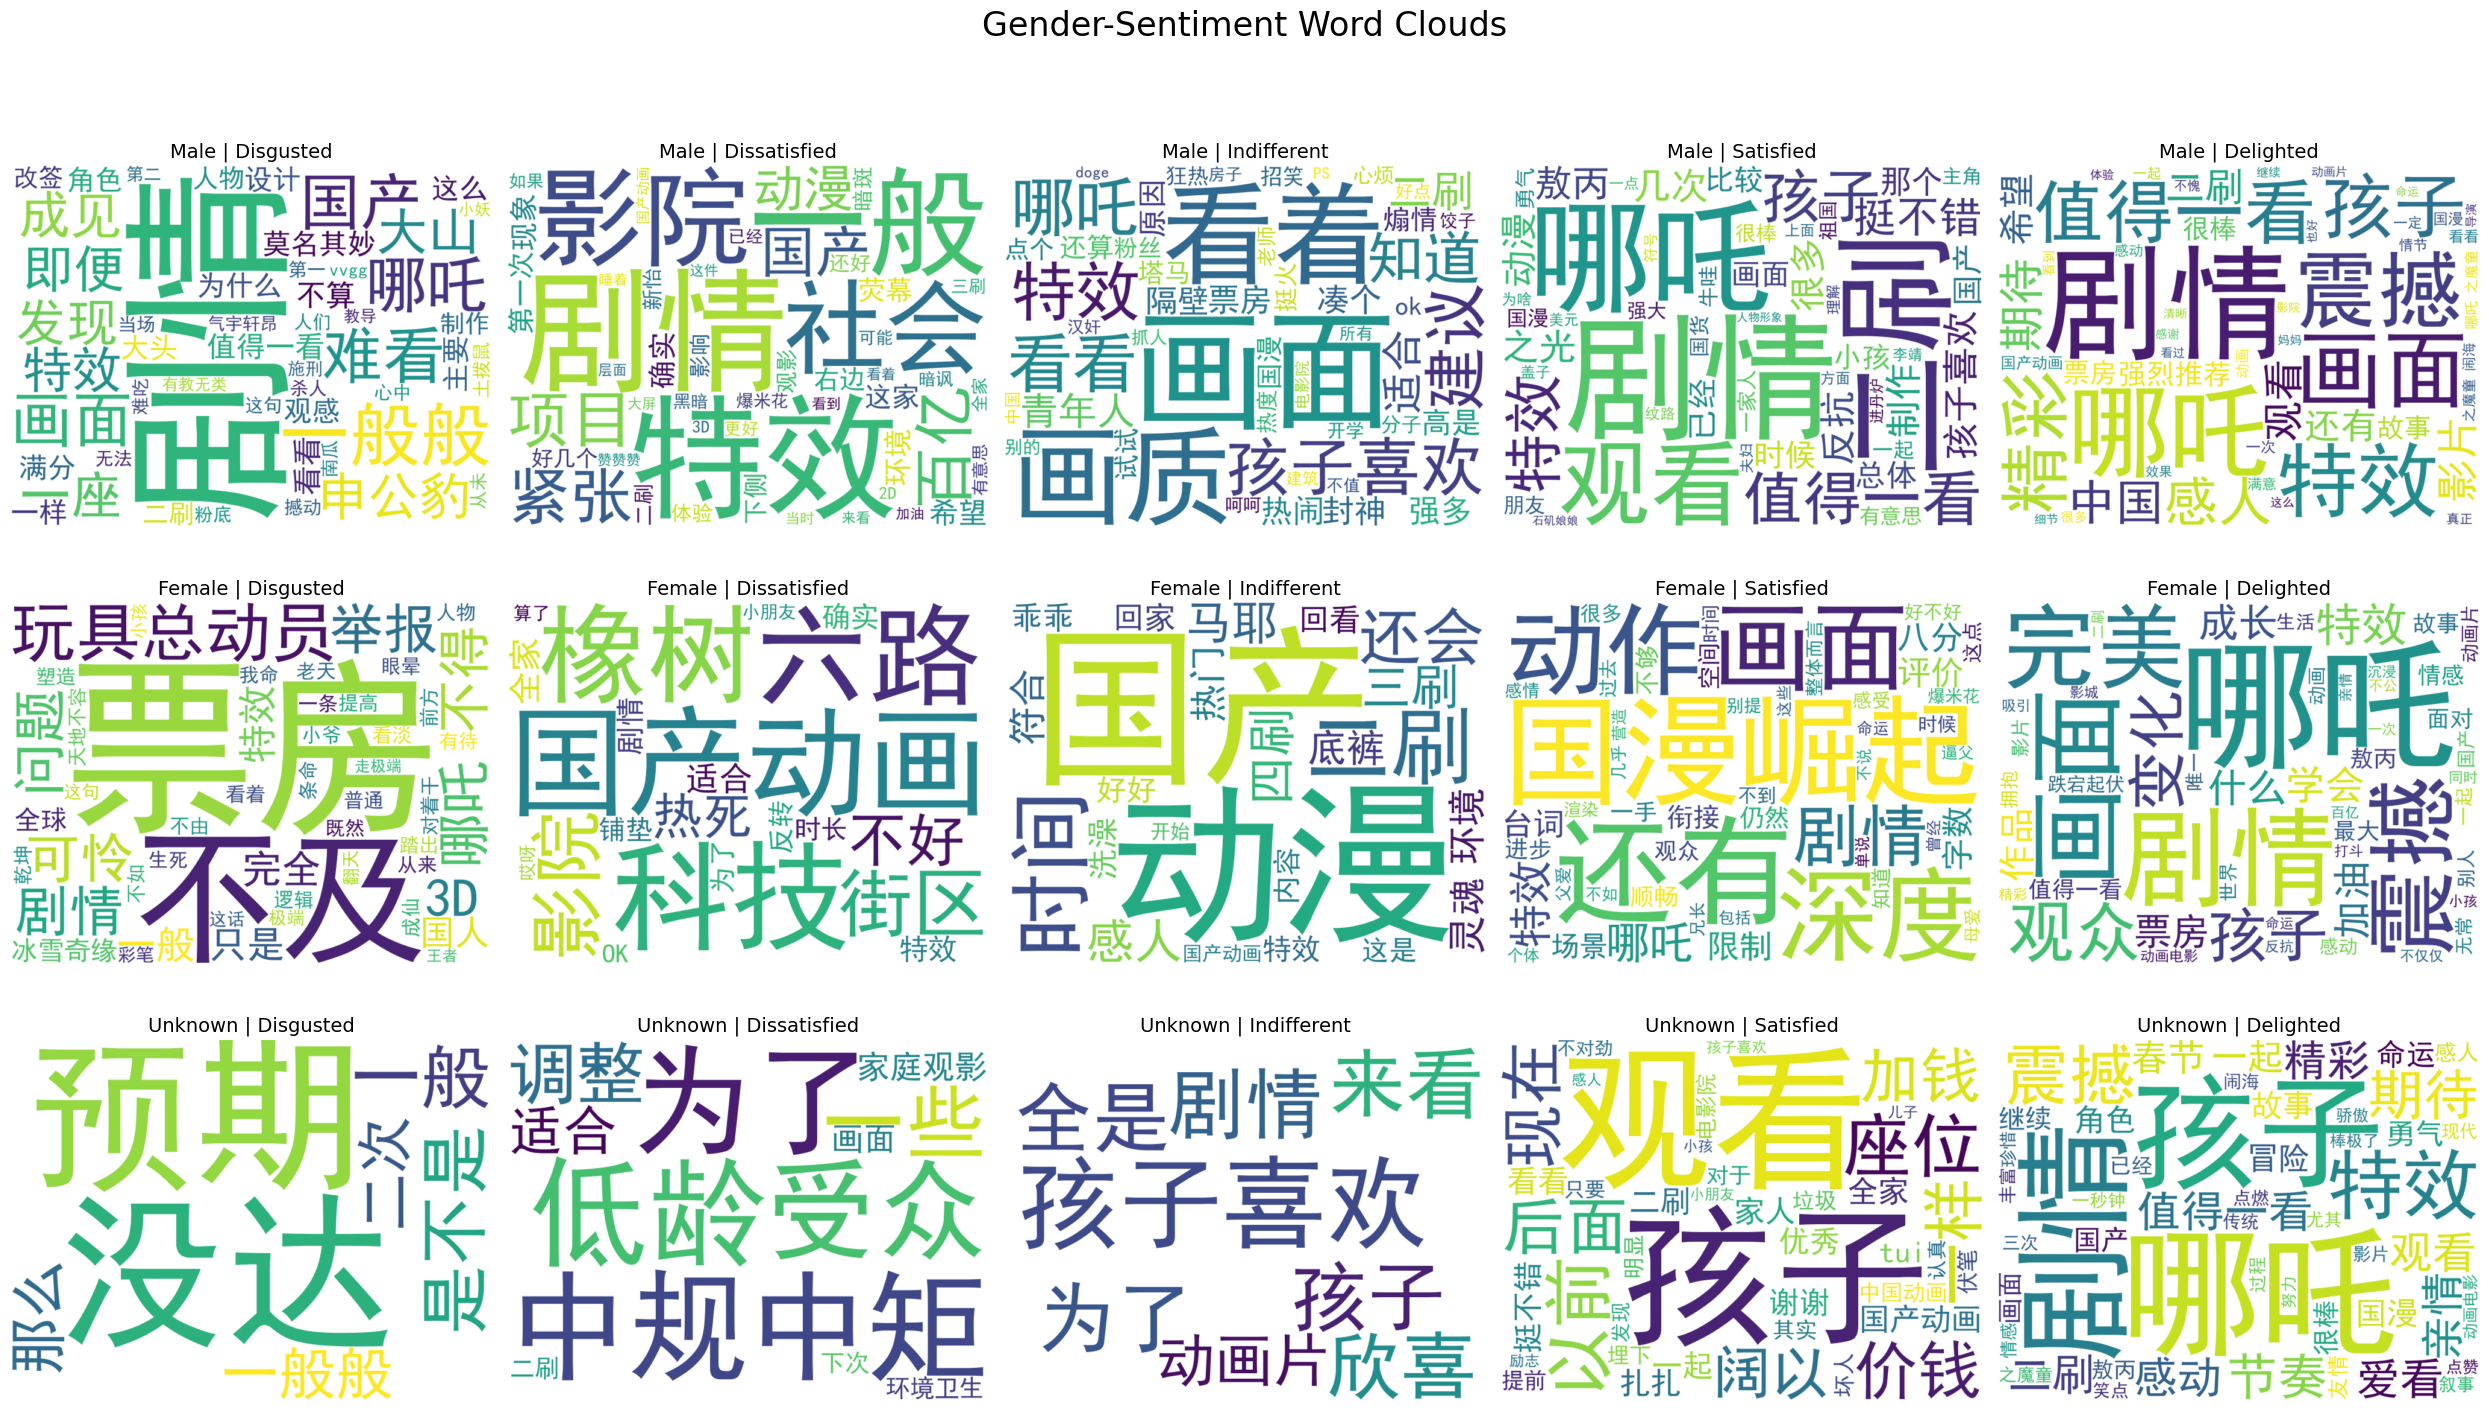

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np

# 初始化 3x5 图板
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
fig.suptitle("Gender-Sentiment Word Clouds", fontsize=24)

def segment_words(text, stopwords):
    words = jieba.cut(text, cut_all=False)
    return " ".join([word for word in words if word not in stopwords and len(word.strip()) > 1])

sentiment_label = {
    0: "Disgusted",
    1: "Dissatisfied",
    2: "Indifferent",
    3: "Satisfied",
    4: "Delighted"
}

gender_labels = {0: "Male", 1: "Female", 2: "Unknown"}
plot_index = 0

for gender in [0, 1, 2]:
    for idx, i in enumerate(np.arange(0, 1.0, 0.2)):
        row, col = gender, idx
        ax = axes[row][col]

        low, high = round(i, 2), round(i + 0.2, 2)
        selected_comments = df[
            (df['sentiment'] >= low) & (df['sentiment'] < high) & (df['gender'] == gender)
        ]['content'].dropna().astype(str)

        if selected_comments.empty:
            ax.axis("off")
            ax.set_title(f"{gender_labels[gender]} | {sentiment_label[idx]}\n[无数据]", fontsize=12)
            continue

        print(f"[处理] gender {gender}，情绪区间：{low} ~ {high}，评论数：{len(selected_comments)}")

        words = " ".join(selected_comments.apply(lambda x: segment_words(x, stopwords)))
        wc = WordCloud(
            width=800,
            height=600,
            background_color="white",
            font_path='C:/Windows/Fonts/simhei.ttf',
            max_words=50
        ).generate(words)

        ax.imshow(wc, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(f"{gender_labels[gender]} | {sentiment_label[idx]}", fontsize=14)

# 自动布局调整
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [21]:
# 分词函数
def segment_words(text, stopwords):
    words = jieba.cut(text, cut_all=True)
    return " ".join([word for word in words if word not in stopwords and len(word.strip()) > 1])

sentiment_label = {
    0: "Disgusted",
    1: "Dissatisfied",
    2: "Indifferent",
    3: "Satisfied",
    4: "Delighted"
}


for gender in [0, 1, 2]:
    j = 0
    for idx, i in enumerate(np.arange(0, 1.0, 0.2)):
        low, high = round(i, 2), round(i + 0.2, 2)

        selected_comments = df[
            (df['sentiment'] >= low) & (df['sentiment'] < high) & (df['gender'] == gender)
        ]['content'].dropna().astype(str)

        if selected_comments.empty:
            print(f"[跳过] gender {gender}，情绪区间 {low} ~ {high} 内无评论")
            continue

        print(f"[处理] gender {gender}，情绪区间：{low} ~ {high}，评论数：{len(selected_comments)}")

        words = " ".join(selected_comments.apply(lambda x: segment_words(x, stopwords)))

        wc = WordCloud(
            width=800,
            height=600,
            background_color="white",
            font_path='C:/Windows/Fonts/simhei.ttf',
            max_words=50
        ).generate(words)

        plt.figure(figsize=(10, 7.5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{gender_labels[gender]} feeling {sentiment_label[idx]}", fontsize=18, pad=20)
        # plt.show()
        output_path = f"D:/information_information_visualization_HW/final_project/public/data/neo_wordcloud/Gender{gender}Sentiment{j}.png"
        plt.savefig(output_path, bbox_inches='tight', dpi=300)
        plt.close()

        print(f"✅ 带标题的词云已保存到：{output_path}")
        j += 1

[处理] gender 0，情绪区间：0.0 ~ 0.2，评论数：59
✅ 带标题的词云已保存到：D:/information_information_visualization_HW/final_project/public/data/neo_wordcloud/Gender0Sentiment0.png
[处理] gender 0，情绪区间：0.2 ~ 0.4，评论数：33
✅ 带标题的词云已保存到：D:/information_information_visualization_HW/final_project/public/data/neo_wordcloud/Gender0Sentiment1.png
[处理] gender 0，情绪区间：0.4 ~ 0.6，评论数：37
✅ 带标题的词云已保存到：D:/information_information_visualization_HW/final_project/public/data/neo_wordcloud/Gender0Sentiment2.png
[处理] gender 0，情绪区间：0.6 ~ 0.8，评论数：96
✅ 带标题的词云已保存到：D:/information_information_visualization_HW/final_project/public/data/neo_wordcloud/Gender0Sentiment3.png
[处理] gender 0，情绪区间：0.8 ~ 1.0，评论数：498
✅ 带标题的词云已保存到：D:/information_information_visualization_HW/final_project/public/data/neo_wordcloud/Gender0Sentiment4.png
[处理] gender 1，情绪区间：0.0 ~ 0.2，评论数：18
✅ 带标题的词云已保存到：D:/information_information_visualization_HW/final_project/public/data/neo_wordcloud/Gender1Sentiment0.png
[处理] gender 1，情绪区间：0.2 ~ 0.4，评论数：10
✅ 带标题的词云已保存到：D:/information_infor

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np

# 定义分词与清洗函数
def segment_words(text, stopwords):
    words = jieba.cut(text, cut_all=True)
    return " ".join([word for word in words if word not in stopwords and len(word.strip()) > 1])

# 使用整个 df 的评论生成词云图
all_comments = df['content'].dropna().astype(str)

# 合并所有分词结果
words = " ".join(all_comments.apply(lambda x: segment_words(x, stopwords)))

# 生成词云
wc = WordCloud(
    width=800,
    height=600,
    background_color="white",
    font_path='C:/Windows/Fonts/simhei.ttf',  # 中文支持
    max_words=50
).generate(words)

# 创建 Matplotlib 图表，并添加标题
plt.figure(figsize=(10, 7.5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for All Comments", fontsize=18, pad=20)

# 保存图像，包括标题
output_path = f"D:/information_information_visualization_HW/final_project/public/data/neo_wordcloud/AllCommentsSentimentG.png"
plt.savefig(output_path, bbox_inches='tight', dpi=300)
plt.close()

print(f"✅ 带标题的词云已保存到：{output_path}")



✅ 带标题的词云已保存到：D:/information_information_visualization_HW/final_project/public/data/neo_wordcloud/AllCommentsSentimentG.png
